In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import ScalarFormatter

In [48]:
#read in files
file_path = "Merge Data Folders/official.csv"

# Read the census data 
df1 = pd.read_csv(file_path)
df1.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282


In [49]:
df1.columns

Index(['State', 'Library ID', 'Submission Year', 'Library Name',
       'Street Address', 'City', 'Zip Code', 'Longitude', 'Latitude',
       'State Code', 'County Code', 'County', 'County Population',
       'Print_Collection_Expenditures', 'Digital_Collection_Expenditures',
       'Total Collection Expenditures', 'Total Operating Expenditures',
       'Print Collection', 'Digital Collection', 'Audio Collection',
       'Library Visits', 'Registered Users', 'Name', 'median_household_income',
       'total_population', 'median_age', 'per_capita', 'education_none',
       'education_high_school', 'education_ged', 'education_associates',
       'education_bachelors', 'education_masters', 'education_professional',
       'education_doctorate', 'state', 'zipcode', 'year',
       'education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'edu

In [50]:
#add registered users columns

df1["reg_users_perc"] = df1["Registered Users"] / df1["total_population"]
df1.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480


# Reported Education Data Analysis

In [76]:
#add education percentage columns

df1["total_edu"] = df1['education_none_perc'] +  df1['education_high_school_perc'] + df1['education_ged_perc'] + df1['education_associates_perc']+df1['education_bachelors_perc'] + df1['education_masters_perc'] +df1['education_professional_perc'] + df1['education_doctorate_perc']
df1.head()
        

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206


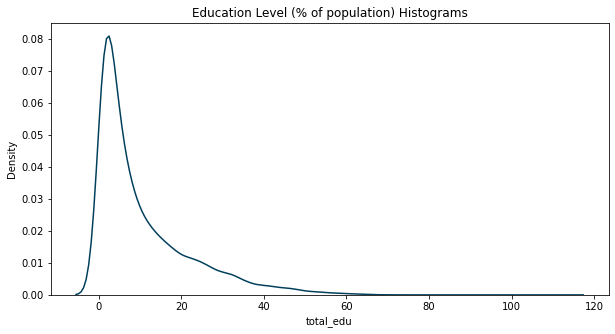

In [52]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df1, x="total_edu")
plt.title("Education Level (% of population) Histograms")
plt.show()

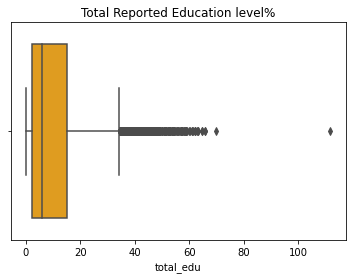

In [53]:
ax = sns.boxplot(x="total_edu", data=df1, color="#FFA600")

plt.title("Total Reported Education level%")

plt.show()

# Drop Outliers

In [54]:
df= df1.copy()

In [55]:
# Reported Education Numbers over total population of area
mask= df.total_edu <= 100
df = df.loc[mask]
df

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,WY,WY0019,2015,SUBLETTE COUNTY LIBRARY,155 S TYLER ST,PINEDALE,82941,-109.861281,42.865097,56,...,0.000000,1.114130,0.103034,0.429121,0.617074,0.235507,0.030571,0.000000,0.068761,2.529438
9167,WY,WY0020,2015,TETON COUNTY LIBRARY,125 VIRGINIAN LANE,JACKSON,83001,-110.779203,43.471780,56,...,0.049372,3.006325,0.517734,0.641830,5.941928,1.885458,0.360279,0.230845,0.432948,12.633770
9168,WY,WY0021,2015,UINTA COUNTY LIBRARY,701 MAIN ST,EVANSTON,82930,-110.963405,41.265975,56,...,0.035921,4.862555,0.949068,1.266684,2.384013,0.661701,0.260899,0.060498,0.307766,10.481340
9169,WY,WY0022,2015,WASHAKIE COUNTY LIBRARY,1019 COBURN AVE,WORLAND,82401,-107.955461,44.015771,56,...,0.087723,2.882326,0.474122,1.063119,1.591545,0.530515,0.139939,0.000000,0.141485,6.769289


In [56]:
# Drop Registered Users under 0%
mask= df1["reg_users_perc"] >0
df= df.loc[mask]
df

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,WY,WY0019,2015,SUBLETTE COUNTY LIBRARY,155 S TYLER ST,PINEDALE,82941,-109.861281,42.865097,56,...,0.000000,1.114130,0.103034,0.429121,0.617074,0.235507,0.030571,0.000000,0.068761,2.529438
9167,WY,WY0020,2015,TETON COUNTY LIBRARY,125 VIRGINIAN LANE,JACKSON,83001,-110.779203,43.471780,56,...,0.049372,3.006325,0.517734,0.641830,5.941928,1.885458,0.360279,0.230845,0.432948,12.633770
9168,WY,WY0021,2015,UINTA COUNTY LIBRARY,701 MAIN ST,EVANSTON,82930,-110.963405,41.265975,56,...,0.035921,4.862555,0.949068,1.266684,2.384013,0.661701,0.260899,0.060498,0.307766,10.481340
9169,WY,WY0022,2015,WASHAKIE COUNTY LIBRARY,1019 COBURN AVE,WORLAND,82401,-107.955461,44.015771,56,...,0.087723,2.882326,0.474122,1.063119,1.591545,0.530515,0.139939,0.000000,0.141485,6.769289


In [57]:
df.describe()

,Submission Year,Zip Code,Longitude,Latitude,State Code,County Code,County Population,Print_Collection_Expenditures,Digital_Collection_Expenditures,Total Collection Expenditures,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
count,9158.0,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9.158000e+03,9.158000e+03,9.158000e+03,9.158000e+03,...,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000
mean,2015.0,44652.357283,-87.401738,39.789535,29.994977,80.438087,3.356552e+05,8.058800e+04,2.926657e+04,1.368460e+05,...,0.208978,4.256910,0.758204,1.304415,2.499417,1.078157,0.240255,0.172203,0.407246,10.518537
std,0.0,28172.767327,16.853048,6.257637,14.232656,85.399691,9.005851e+05,3.406765e+05,1.671361e+05,5.996532e+05,...,0.442524,4.874741,1.023870,1.481532,3.063890,1.405093,0.381123,0.369758,1.670193,11.428944
min,2015.0,1001.000000,-170.280072,0.000000,1.000000,1.000000,2.620000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000046,0.007547
25%,2015.0,14892.750000,-95.936673,37.885557,19.000000,21.000000,2.225400e+04,6.072750e+03,0.000000e+00,7.952250e+03,...,0.010418,0.911891,0.108014,0.276805,0.414125,0.148544,0.018883,0.009909,0.023394,2.199874
50%,2015.0,49327.500000,-87.599305,41.091995,31.000000,59.000000,6.341950e+04,1.745100e+04,1.480000e+03,2.403550e+04,...,0.059233,2.381512,0.344425,0.708456,1.191388,0.501729,0.084460,0.051232,0.072248,5.964702
75%,2015.0,66712.750000,-75.969847,42.868330,41.000000,113.000000,2.657290e+05,5.395325e+04,9.985250e+03,8.064075e+04,...,0.213770,5.739185,0.999807,1.833555,3.472736,1.480601,0.300554,0.189038,0.227619,15.106779
max,2015.0,99929.000000,0.000000,71.298460,56.000000,840.000000,1.011670e+07,1.718262e+07,7.390207e+06,2.761352e+07,...,6.841421,41.722166,8.714854,10.657207,23.740241,14.783314,4.853758,9.438945,50.279875,69.926489


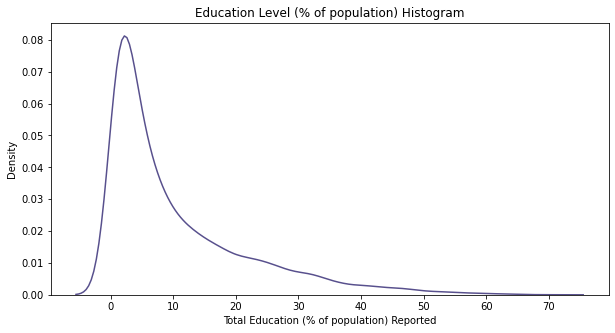

In [73]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="total_edu", color="#58508D")
plt.title("Education Level (% of population) Histogram")
plt.xlabel("Total Education (% of population) Reported")
plt.show()

In [65]:
#create seaborn color palette
# https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
colors = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EC6B56", "#0097a7", "#47B39C"]

# Set your custom color palette
palette = sns.set_palette(sns.color_palette(colors))

percentages= ['education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'education_doctorate_perc']

# General Charts

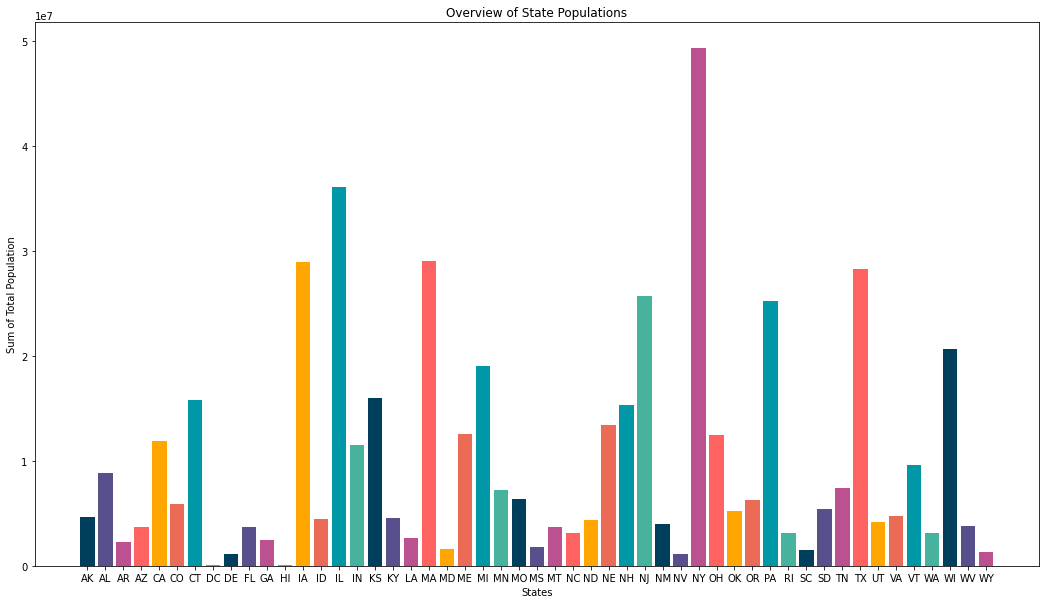

In [63]:
states= df.State.unique()
bar= df.groupby("State").total_population.sum()

plt.figure(figsize=(18,10))
plt.bar(states, bar, color=colors)

plt.ylabel("Sum of Total Population")
plt.xlabel("States")
plt.title("Overview of State Populations")
plt.show()

In [14]:
bar

State
AK     4646538.0
AL     8834619.0
AR     2247513.0
AZ     3717163.0
CA    11923772.0
CO     5864830.0
CT    15797899.0
DC       85976.0
DE     1117547.0
FL     3716602.0
GA     2477864.0
HI       64800.0
IA    28898903.0
ID     4463270.0
IL    36055074.0
IN    11511649.0
KS    16004058.0
KY     4528447.0
LA     2681886.0
MA    29026093.0
MD     1593432.0
ME    12547819.0
MI    19071520.0
MN     7243634.0
MO     6398431.0
MS     1803480.0
MT     3653599.0
NC     3129713.0
ND     4392014.0
NE    13428669.0
NH    15271749.0
NJ    25723103.0
NM     3997653.0
NV     1095985.0
NY    49303124.0
OH    12471818.0
OK     5229952.0
OR     6224110.0
PA    25227049.0
RI     3157932.0
SC     1527131.0
SD     5379372.0
TN     7376741.0
TX    28250108.0
UT     4138130.0
VA     4780156.0
VT     9628274.0
WA     3145724.0
WI    20623072.0
WV     3766488.0
WY     1330496.0
Name: total_population, dtype: float64

# heatmap

In [15]:
heatmap = pd.DataFrame()

heatmap["No Degree"] = df["education_none_perc"]
heatmap["High School"] = df["education_high_school_perc"]
heatmap["GED"] = df["education_ged_perc"]
heatmap["Associates"] = df["education_associates_perc"]
heatmap["Bachelors"] = df["education_bachelors_perc"]
heatmap["Masters"] = df["education_masters_perc"]
heatmap["Professional"] = df["education_professional_perc"]
heatmap["Doctorate"] = df["education_doctorate_perc"]
heatmap["Registered Users"] = df["reg_users_perc"]

heatmap.head()

,No Degree,High School,GED,Associates,Bachelors,Masters,Professional,Doctorate,Registered Users
0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200
1,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924
2,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836
3,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724
4,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480


In [16]:
heatmap.describe()

,No Degree,High School,GED,Associates,Bachelors,Masters,Professional,Doctorate,Registered Users
count,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000
mean,0.208978,4.256910,0.758204,1.304415,2.499417,1.078157,0.240255,0.172203,0.407246
std,0.442524,4.874741,1.023870,1.481532,3.063890,1.405093,0.381123,0.369758,1.670193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000046
25%,0.010418,0.911891,0.108014,0.276805,0.414125,0.148544,0.018883,0.009909,0.023394
50%,0.059233,2.381512,0.344425,0.708456,1.191388,0.501729,0.084460,0.051232,0.072248
75%,0.213770,5.739185,0.999807,1.833555,3.472736,1.480601,0.300554,0.189038,0.227619
max,6.841421,41.722166,8.714854,10.657207,23.740241,14.783314,4.853758,9.438945,50.279875


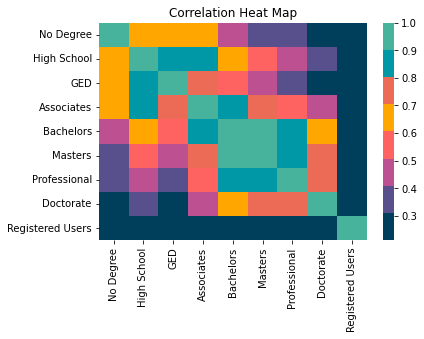

In [17]:
#correlation table
corrs =heatmap.corr()
corrs

#show heatmap of correlation table above
sns.heatmap(corrs, cmap=colors)
plt.title("Correlation Heat Map")
plt.show()

# KDE Analysis

In [18]:
lower_bounds = []
upper_bounds = []
range_edu =[]

for perc in percentages:

    quartiles = df[perc].quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound= lowerq - (1.5*iqr)
    upper_bound= upperq + (1.5*iqr)
    
    range_edu.append(iqr)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

    #identify any outliers
    
    mask = (df[perc]> upper_bound) | (df[perc]< lower_bound)
    outlier = df.loc[mask]
    
    #https://datatofish.com/pandas-dataframe-empty/
    #https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/
    if outlier.empty==False:
        print(perc)
        display(outlier)
    else:
        print(f"No outliers for {perc}.")
        



education_none_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
82,AL,AL0006,2015,HALEYVILLE PUBLIC LIBRARY,913 20TH STREET,HALEYVILLE,35565,-87.623363,34.226400,1,...,0.764484,8.501885,1.474117,2.704834,2.019198,0.843332,0.054851,0.034282,0.128385,16.396983
86,AL,AL0011,2015,ROANOKE - ANNIE L. AWBREY PUBLIC LIBRARY,736 COLLEGE STREET,ROANOKE,36274,-85.370689,33.149541,1,...,0.612385,5.805300,1.573527,2.078814,2.232596,0.859536,0.060415,0.038446,0.202746,13.261019
88,AL,AL0013,2015,SYLACAUGA - B. B. COMER MEMORIAL LIBRARY,314 NORTH BROADWAY AVENUE,SYLACAUGA,35150,-86.250731,33.171811,1,...,0.610866,12.480504,2.472706,2.839875,3.499480,1.312711,0.233949,0.045490,0.990707,23.495581
95,AL,AL0020,2015,TALLADEGA - ARMSTRONG-OSBORNE PUBLIC LIBRARY,202 SOUTH STREET EAST,TALLADEGA,35160,-86.099763,33.433119,1,...,0.824637,15.569150,4.827876,3.244572,4.249130,2.135061,0.698693,0.323858,0.555206,31.872976
107,AL,AL0035,2015,UNION SPRINGS PUBLIC LIBRARY,103 NORTH PRAIRIE STREET,UNION SPRINGS,36089,-85.716112,32.140621,1,...,0.931646,4.578942,1.037365,0.505468,0.948165,0.792890,0.412964,0.102415,0.072219,9.309855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,WI,WI0268,2015,RACINE PUBLIC LIBRARY,75 SEVENTH ST.,RACINE,53403,-87.781414,42.726007,55,...,0.788982,8.685808,2.492997,3.265640,4.976657,2.021475,0.408497,0.298786,1.413025,22.938842
8931,WI,WI0292,2015,MEAD PUBLIC LIBRARY,710 N. 8TH ST.,SHEBOYGAN,53081,-87.712943,43.752360,55,...,1.319693,22.616962,3.872656,6.040221,8.616542,2.947703,0.422769,0.238245,0.953449,46.074790
8980,WI,WI0344,2015,WEST ALLIS PUBLIC LIBRARY,7421 W. NATIONAL AVE.,WEST ALLIS,53214,-88.005487,43.012080,55,...,0.682862,16.643270,2.843275,5.553308,10.000238,2.117585,0.287896,0.235552,0.951200,38.363987
9051,WV,WV0001,2015,RALEIGH COUNTY PUBLIC LIBRARY,221 N. KANAWHA ST.,BECKLEY,25801,-81.187807,37.779801,54,...,0.590903,18.686018,4.027472,4.289232,9.135674,3.457302,0.785279,0.347285,1.107607,41.319165


education_high_school_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
95,AL,AL0020,2015,TALLADEGA - ARMSTRONG-OSBORNE PUBLIC LIBRARY,202 SOUTH STREET EAST,TALLADEGA,35160,-86.099763,33.433119,1,...,0.824637,15.569150,4.827876,3.244572,4.249130,2.135061,0.698693,0.323858,0.555206,31.872976
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
159,AL,AL0091,2015,BESSEMER PUBLIC LIBRARY,400 19TH STREET N,BESSEMER,35020,-86.954919,33.403367,1,...,0.754732,21.839310,3.661848,5.758326,4.081144,1.529431,0.567047,0.119799,0.728296,38.311636
216,AL,AL0154,2015,ANNISTON - CALHOUN COUNTY PUBLIC LIBRARY,108 EAST 10TH STREET,ANNISTON,36201,-85.828232,33.657102,1,...,1.721113,14.733896,3.471468,2.677751,2.126326,1.056897,0.121146,0.108614,1.055769,26.017211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,WV,WV0003,2015,PRINCETON PUBLIC LIBRARY,920 MERCER STREET,PRINCETON,24740,-81.095438,37.369408,54,...,0.572202,16.920837,4.122921,3.885355,7.448847,2.419087,1.203157,0.352517,0.693489,36.924924
9088,WV,WV0040,2015,CLARKSBURG-HARRISON CO. PUBLIC LIBRARY,404 W. PIKE STREET,CLARKSBURG,26301,-80.340653,39.280822,54,...,0.450511,19.650854,3.832024,4.086777,6.690622,2.215012,0.517551,0.268161,0.500442,37.711512
9092,WV,WV0044,2015,NUTTER FORT PUBLIC LIBRARY,1300 BUCKHANNON PIKE,NUTTER FORT,26301,-80.318850,39.254668,54,...,0.450511,19.650854,3.832024,4.086777,6.690622,2.215012,0.517551,0.268161,0.030758,37.711512
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560


education_ged_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
50,AK,AK0078,2015,WASILLA PUBLIC LIBRARY,391 NORTH MAIN STREET,WASILLA,99654,-149.441482,61.583125,2,...,0.181442,12.542192,2.864385,4.486692,5.923554,2.049230,0.396238,0.229471,0.136242,28.673204
88,AL,AL0013,2015,SYLACAUGA - B. B. COMER MEMORIAL LIBRARY,314 NORTH BROADWAY AVENUE,SYLACAUGA,35150,-86.250731,33.171811,1,...,0.610866,12.480504,2.472706,2.839875,3.499480,1.312711,0.233949,0.045490,0.990707,23.495581
95,AL,AL0020,2015,TALLADEGA - ARMSTRONG-OSBORNE PUBLIC LIBRARY,202 SOUTH STREET EAST,TALLADEGA,35160,-86.099763,33.433119,1,...,0.824637,15.569150,4.827876,3.244572,4.249130,2.135061,0.698693,0.323858,0.555206,31.872976
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
128,AL,AL0057,2015,WETUMPKA PUBLIC LIBRARY,212 SOUTH MAIN STREET,WETUMPKA,36092,-86.205711,32.535896,1,...,0.407267,7.399036,3.445776,2.164271,3.072626,1.626935,0.166318,0.000000,0.441469,18.282230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9115,WV,WV0068,2015,MARY H. WEIR PUBLIC LIBRARY,3442 MAIN STREET,WEIRTON,26062,-80.589901,40.400559,54,...,0.398660,12.898965,2.382175,3.558588,5.720645,1.751168,0.545406,0.149192,0.334948,27.404799
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968
9125,WV,WV0078,2015,FAYETTE COUNTY PUBLIC LIBRARY,531 SUMMIT STREET,OAK HILL,25901,-81.152984,37.972081,54,...,0.439639,6.702428,2.789913,1.249793,2.195432,0.884809,0.094011,0.022120,0.590140,14.378145


education_associates_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
50,AK,AK0078,2015,WASILLA PUBLIC LIBRARY,391 NORTH MAIN STREET,WASILLA,99654,-149.441482,61.583125,2,...,0.181442,12.542192,2.864385,4.486692,5.923554,2.049230,0.396238,0.229471,0.136242,28.673204
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
152,AL,AL0083,2015,FOLEY PUBLIC LIBRARY,319 EAST LAUREL AVENUE,FOLEY,36535,-87.679586,30.406366,1,...,0.369995,12.766008,2.891617,4.854712,6.247496,2.370796,0.862536,0.214456,0.563877,30.577616
159,AL,AL0091,2015,BESSEMER PUBLIC LIBRARY,400 19TH STREET N,BESSEMER,35020,-86.954919,33.403367,1,...,0.754732,21.839310,3.661848,5.758326,4.081144,1.529431,0.567047,0.119799,0.728296,38.311636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,WI,WI0360,2015,MCMILLAN MEMORIAL LIBRARY,490 E. GRAND AVE.,WISCONSIN RAPIDS,54494,-89.821407,44.388313,55,...,0.141858,12.809949,1.700350,5.196269,4.869802,1.575981,0.373105,0.237077,0.417586,26.904392
9051,WV,WV0001,2015,RALEIGH COUNTY PUBLIC LIBRARY,221 N. KANAWHA ST.,BECKLEY,25801,-81.187807,37.779801,54,...,0.590903,18.686018,4.027472,4.289232,9.135674,3.457302,0.785279,0.347285,1.107607,41.319165
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968


education_bachelors_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
150,AL,AL0081,2015,DAPHNE PUBLIC LIBRARY,2607 U.S. HIGHWAY 98,DAPHNE,36526,-87.905194,30.618100,1,...,0.173743,5.986227,0.841863,2.813053,9.709060,2.563495,0.822909,0.499115,0.365191,23.409464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,WV,WV0001,2015,RALEIGH COUNTY PUBLIC LIBRARY,221 N. KANAWHA ST.,BECKLEY,25801,-81.187807,37.779801,54,...,0.590903,18.686018,4.027472,4.289232,9.135674,3.457302,0.785279,0.347285,1.107607,41.319165
9054,WV,WV0004,2015,CABELL COUNTY PUBLIC LIBRARY,455 9TH STREET,HUNTINGTON,25701,-82.443666,38.419830,54,...,0.291157,9.244932,2.099104,3.546571,8.083077,5.407204,1.855087,1.117489,2.643651,31.644622
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560


education_masters_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
151,AL,AL0082,2015,FAIRHOPE PUBLIC LIBRARY,501 FAIRHOPE AVENUE,FAIRHOPE,36532,-87.900890,30.523053,1,...,0.164533,6.525387,1.105663,3.017539,9.478759,4.254829,1.385370,0.705848,0.330761,26.637928
165,AL,AL0097,2015,HOMEWOOD PUBLIC LIBRARY,1721 OXMOOR ROAD,HOMEWOOD,35209,-86.795527,33.475485,1,...,0.225175,4.407005,0.993184,1.827540,10.736042,3.980780,2.923259,1.523955,0.470958,26.616940
166,AL,AL0098,2015,HOOVER PUBLIC LIBRARY,200 MUNICIPAL DRIVE,HOOVER,35216,-86.805959,33.387877,1,...,0.134139,5.756660,0.632911,2.924617,14.249008,5.435481,2.108445,1.579445,1.140091,32.820707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,WI,WI0424,2015,FITCHBURG PUBLIC LIBRARY,5530 LACY RD.,FITCHBURG,53711,-89.425400,43.001241,55,...,0.374754,5.089587,0.994159,3.289353,13.795200,7.527612,2.686918,2.695403,0.231131,36.452986
9054,WV,WV0004,2015,CABELL COUNTY PUBLIC LIBRARY,455 9TH STREET,HUNTINGTON,25701,-82.443666,38.419830,54,...,0.291157,9.244932,2.099104,3.546571,8.083077,5.407204,1.855087,1.117489,2.643651,31.644622
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560


education_professional_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
150,AL,AL0081,2015,DAPHNE PUBLIC LIBRARY,2607 U.S. HIGHWAY 98,DAPHNE,36526,-87.905194,30.618100,1,...,0.173743,5.986227,0.841863,2.813053,9.709060,2.563495,0.822909,0.499115,0.365191,23.409464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,WV,WV0004,2015,CABELL COUNTY PUBLIC LIBRARY,455 9TH STREET,HUNTINGTON,25701,-82.443666,38.419830,54,...,0.291157,9.244932,2.099104,3.546571,8.083077,5.407204,1.855087,1.117489,2.643651,31.644622
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968


education_doctorate_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
106,AL,AL0034,2015,TROY PUBLIC LIBRARY,500 EAST WALNUT STREET,TROY,36081,-85.967735,31.808533,1,...,0.235174,9.478528,1.240627,1.465576,4.580777,2.917519,0.276074,0.630539,0.729414,20.824813
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
124,AL,AL0053,2015,OPELIKA - LEWIS COOPER JR. MEMORIAL LIBRARY,200 SOUTH 6TH STREET,OPELIKA,36801,-85.375949,32.649137,1,...,0.441977,10.086554,2.109916,2.991239,7.021652,3.335876,0.544579,0.562995,0.784641,27.094788
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
150,AL,AL0081,2015,DAPHNE PUBLIC LIBRARY,2607 U.S. HIGHWAY 98,DAPHNE,36526,-87.905194,30.618100,1,...,0.173743,5.986227,0.841863,2.813053,9.709060,2.563495,0.822909,0.499115,0.365191,23.409464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968
9148,WY,WY0001,2015,ALBANY COUNTY PUBLIC LIBRARY,310 SOUTH 8TH ST,LARAMIE,82070,-105.587092,41.310510,56,...,0.106009,3.662516,0.777401,2.043277,6.260783,3.383982,0.588248,1.444636,0.496601,18.266852


In [19]:
#KDE analysis
edu_df = pd.DataFrame()
edu_df["Education Level"]= percentages
edu_df["Lower Bound"]= lower_bounds
edu_df["Upper Bound"]= upper_bounds
edu_df["IQR"] = range_edu

edu_df

,Education Level,Lower Bound,Upper Bound,IQR
0,education_none_perc,-0.294608,0.518796,0.203351
1,education_high_school_perc,-6.329049,12.980126,4.827294
2,education_ged_perc,-1.229676,2.337497,0.891793
3,education_associates_perc,-2.058320,4.168680,1.556750
4,education_bachelors_perc,-4.173791,8.060653,3.058611
5,education_masters_perc,-1.849541,3.478687,1.332057
6,education_professional_perc,-0.403623,0.723060,0.281671
7,education_doctorate_perc,-0.258783,0.457731,0.179129


# histograms

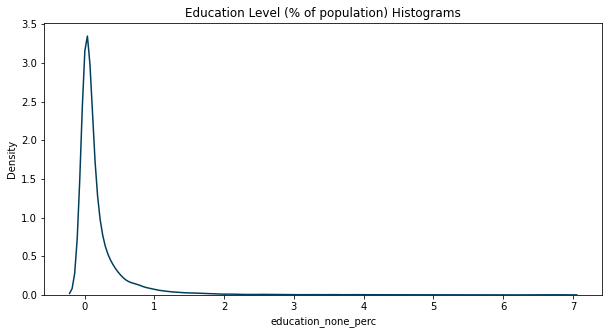

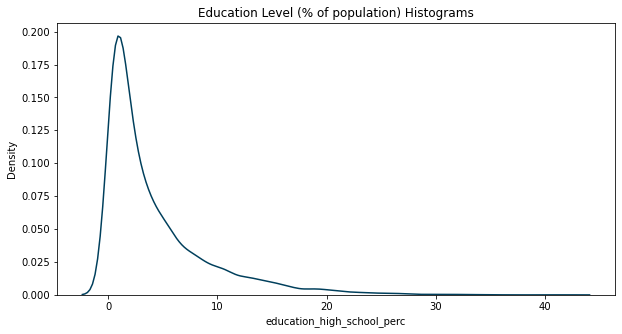

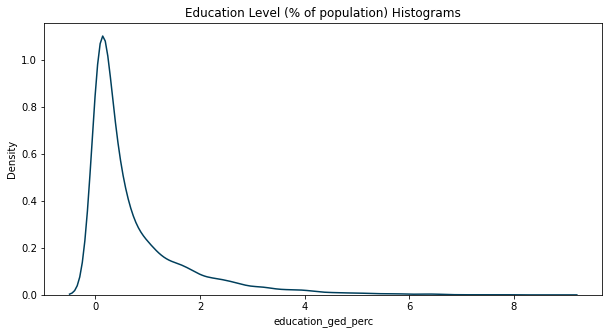

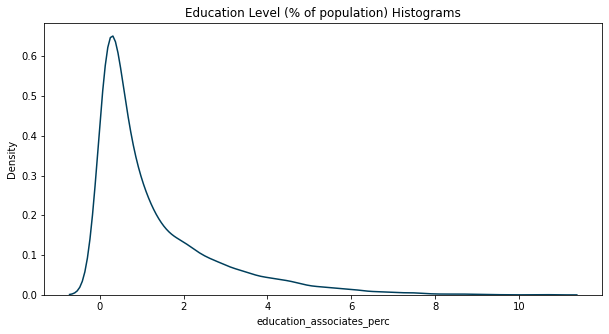

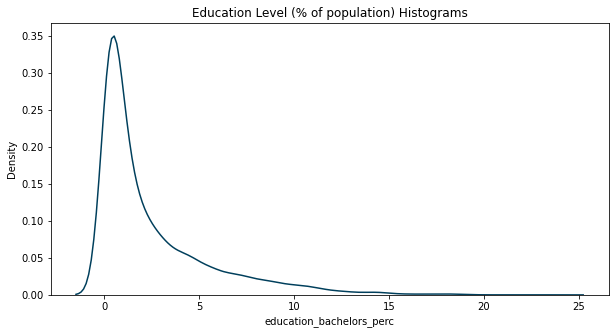

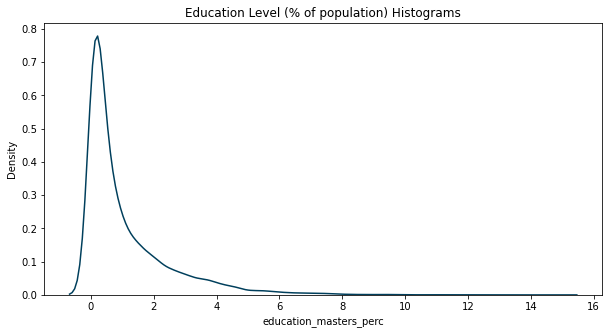

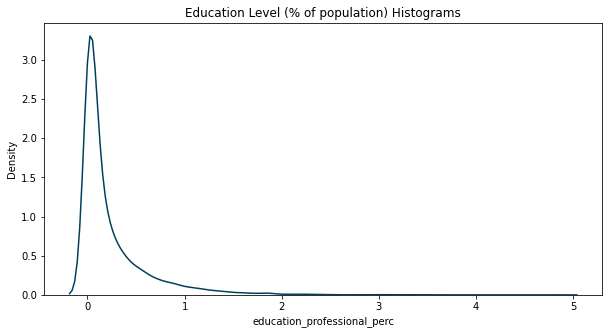

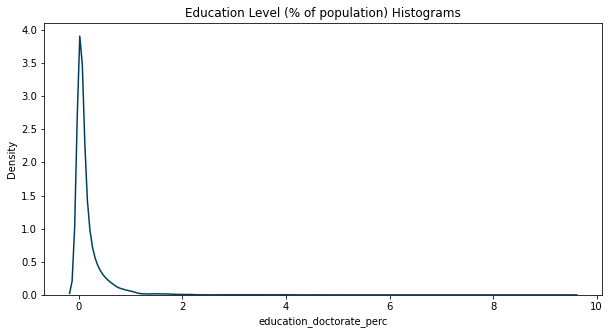

In [20]:
for perc in percentages:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x=perc, color = "#003F5C" )
    plt.title("Education Level (% of population) Histograms")
    plt.show()

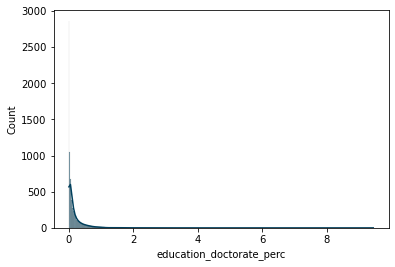

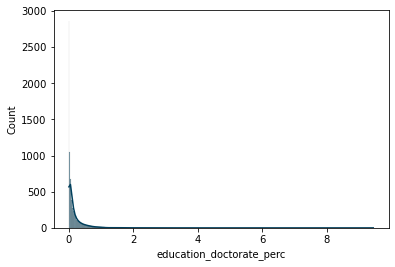

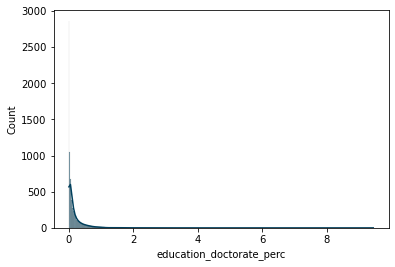

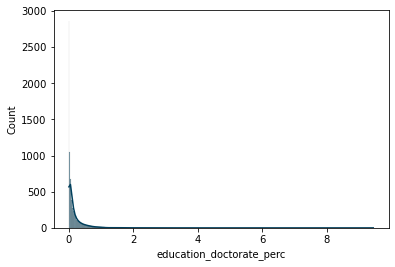

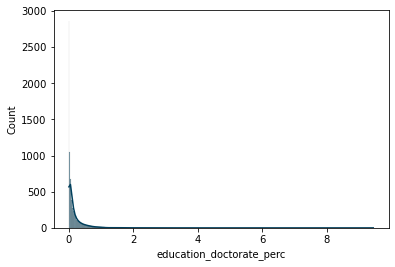

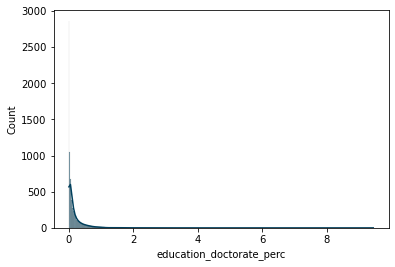

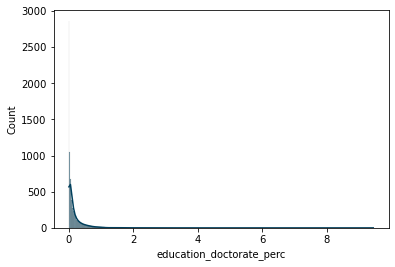

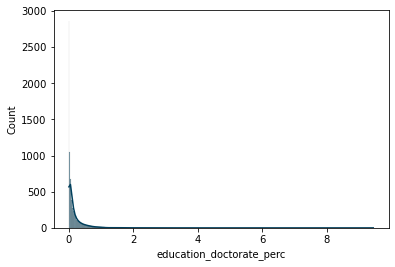

In [21]:
for per in percentages:
    sns.histplot(data=df, x=perc, kde=True)
    plt.show()

# Box and Violin plots

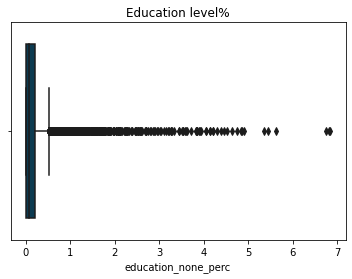

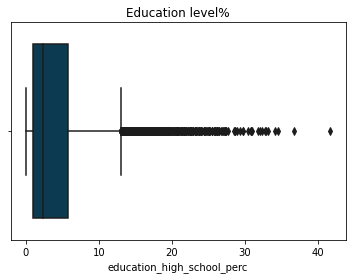

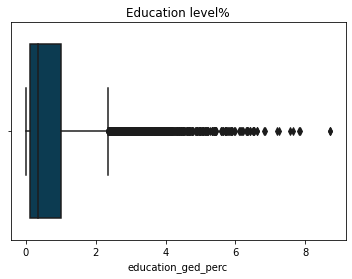

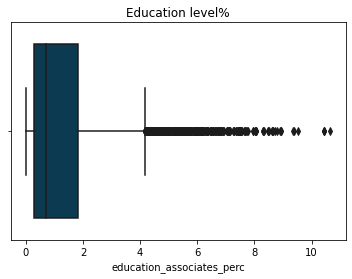

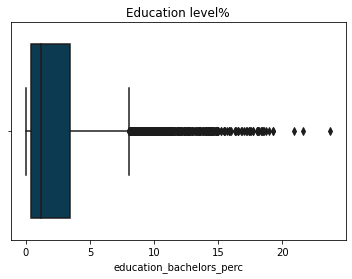

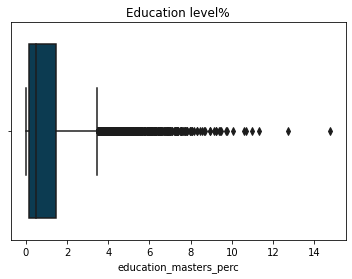

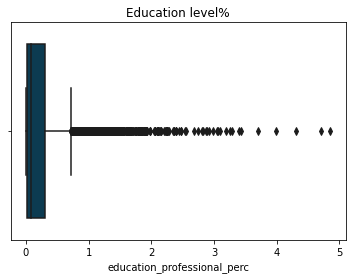

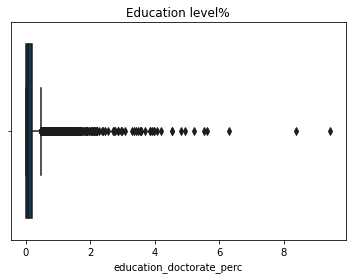

In [94]:
# graph data in box plots-- outliers shown as diamond
#https://seaborn.pydata.org/generated/seaborn.boxplot.html


for perc in percentages:
    ax = sns.boxplot(x=perc, data=df, color="#003F5C")

    plt.title("Education level%")

    # show plot
    plt.show()
    
    

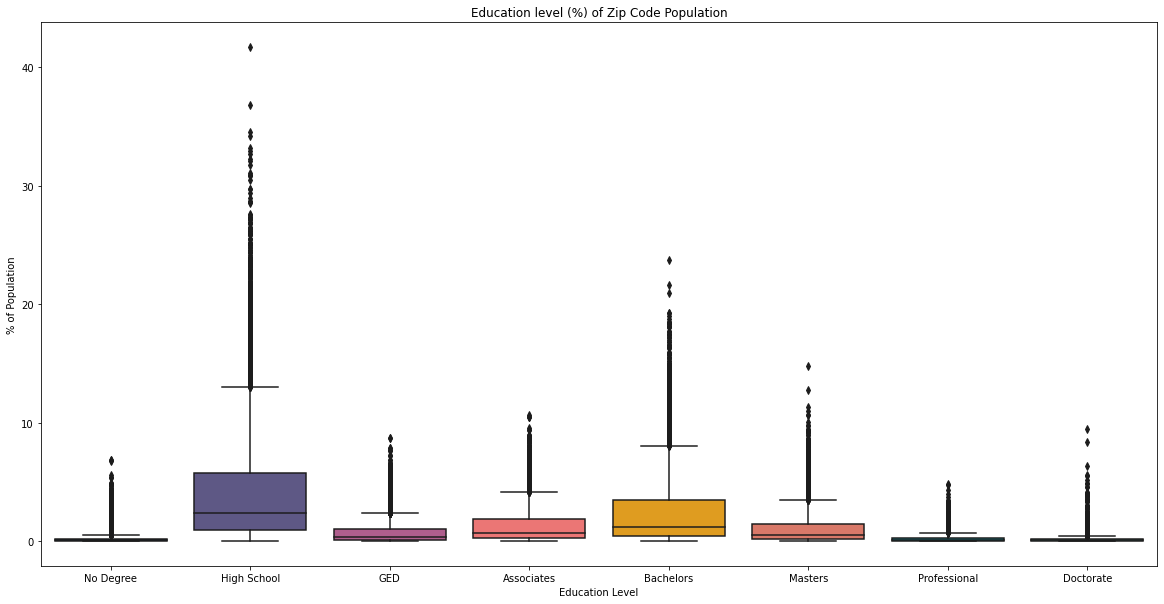

In [69]:
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html

#combined box plot for education

education_df= pd.DataFrame()
education_df["No Degree"] = df["education_none_perc"]
education_df["High School"] = df["education_high_school_perc"]
education_df["GED"] = df["education_ged_perc"]
education_df["Associates"] = df["education_associates_perc"]
education_df["Bachelors"] = df["education_bachelors_perc"]
education_df["Masters"] = df["education_masters_perc"]
education_df["Professional"] = df["education_professional_perc"]
education_df["Doctorate"] = df["education_doctorate_perc"]
education= pd.melt(education_df)

plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", data=education, color=palette)

plt.ylabel("% of Population")
plt.xlabel("Education Level")
plt.title("Education level (%) of Zip Code Population")

plt.show()


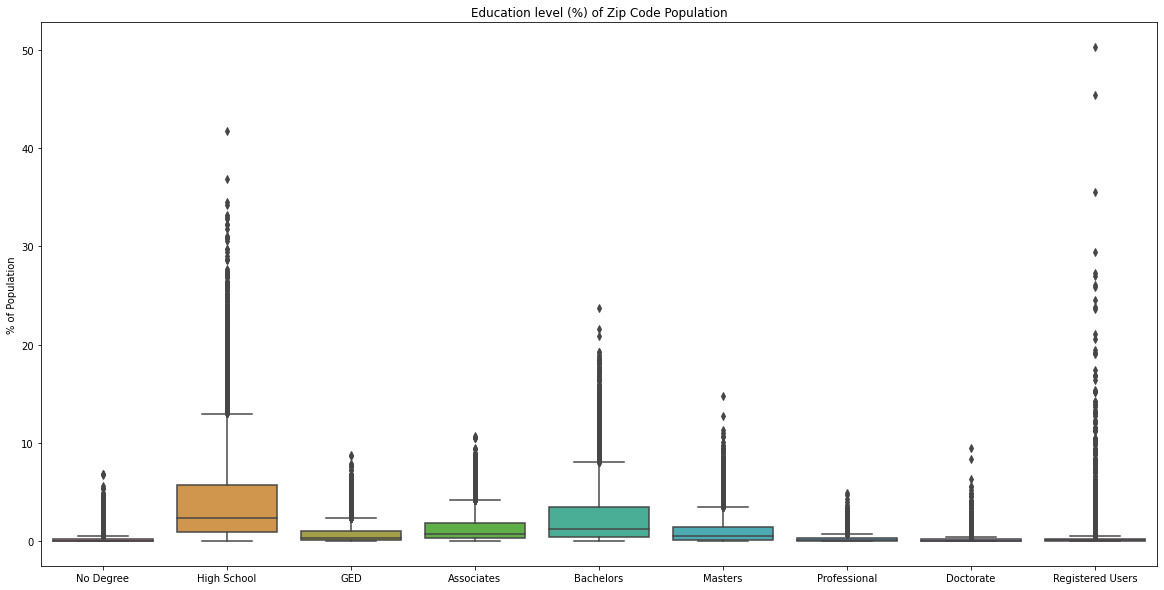

In [24]:
education= pd.melt(heatmap)

plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", data=education)

plt.ylabel("% of Population")
plt.xlabel("")
plt.title("Education level (%) of Zip Code Population")

plt.show()

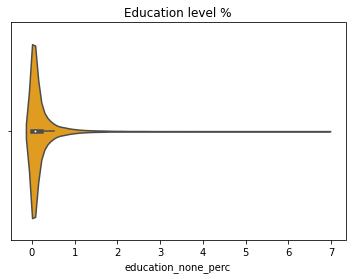

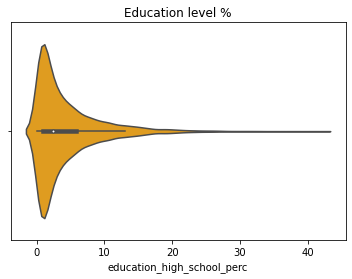

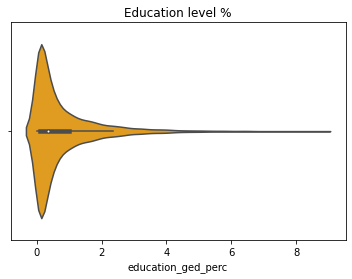

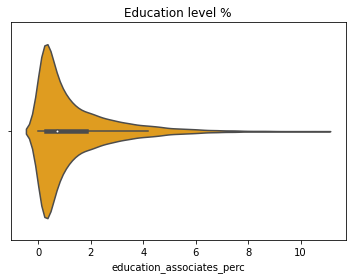

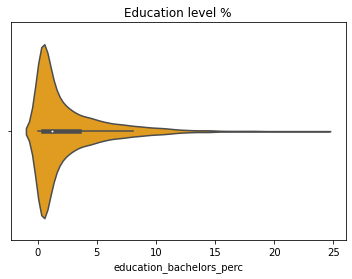

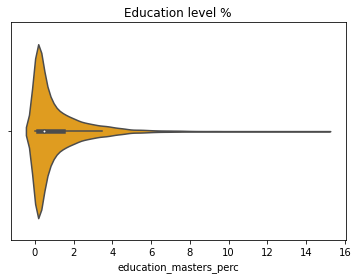

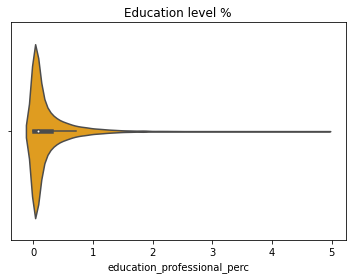

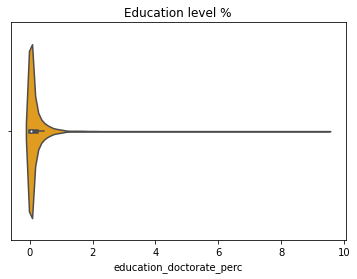

In [25]:
#violin plots

for perc in percentages:
    ax = sns.violinplot(x=perc, data=df, color="#FFA600")

    plt.title("Education level %")

    #set axis at 0
    #plt.ylim(0, 80)

    # show plot
    plt.show()
    


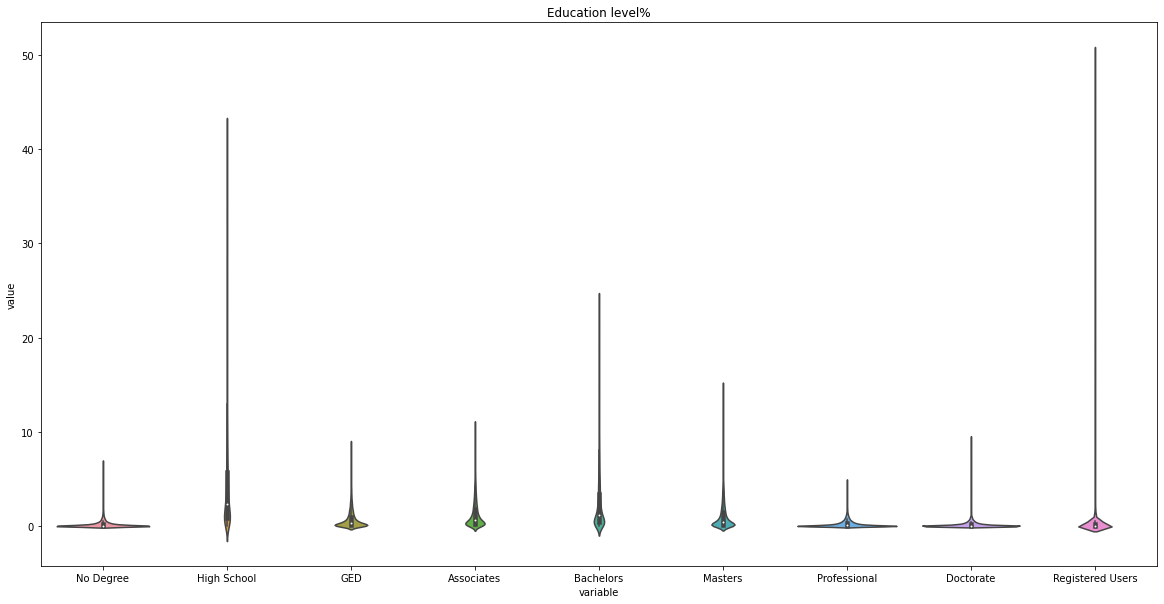

In [26]:
#combined violin plot

plt.figure(figsize=(20,10))
ax = sns.violinplot(x="variable", y="value", data=education)

plt.title("Education level%")

plt.show()

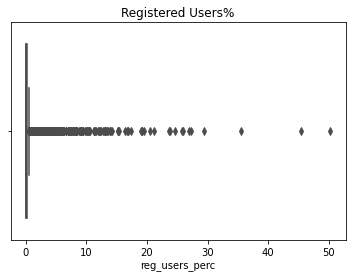

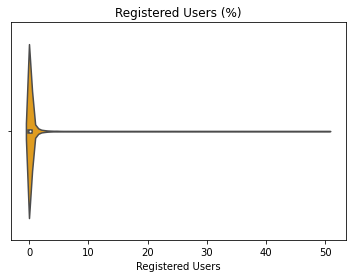

In [70]:
ax = sns.boxplot(x="reg_users_perc", data=df, color="#FFA600")

plt.title("Registered Users%")

plt.show()

ax = sns.violinplot(x="reg_users_perc", data=df, color="#FFA600")

plt.title("Registered Users (%)")
plt.xlabel("Registered Users")

plt.show()

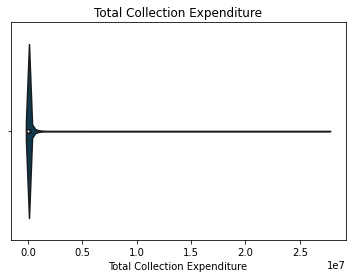

In [96]:
ax = sns.violinplot(x="Total Collection Expenditures", data=df, color="#003F5C")

plt.title("Total Collection Expenditure")
plt.xlabel("Total Collection Expenditure")

plt.show()

# linear regression

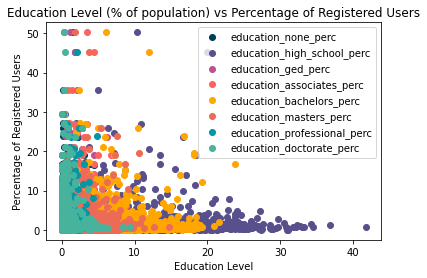

In [29]:
#make scatter plot


plt.scatter(df["education_none_perc"], df["reg_users_perc"], color= "#003F5C")
plt.scatter(df["education_high_school_perc"], df["reg_users_perc"], color= "#58508D")
plt.scatter(df["education_ged_perc"], df["reg_users_perc"], color= "#BC5090")
plt.scatter(df["education_associates_perc"], df["reg_users_perc"], color= "#FF6361")
plt.scatter(df["education_bachelors_perc"], df["reg_users_perc"], color= "#FFA600")
plt.scatter(df["education_masters_perc"], df["reg_users_perc"], color= "#EC6B56")
plt.scatter(df["education_professional_perc"], df["reg_users_perc"], color= "#0097a7")
plt.scatter(df["education_doctorate_perc"], df["reg_users_perc"], color= "#47B39C")

plt.legend(percentages)

#axis titles
plt.title('Education Level (% of population) vs Percentage of Registered Users')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Registered Users')


plt.show()

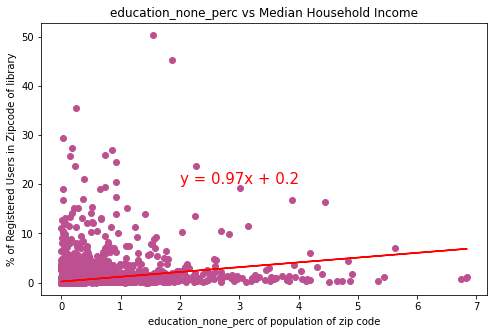

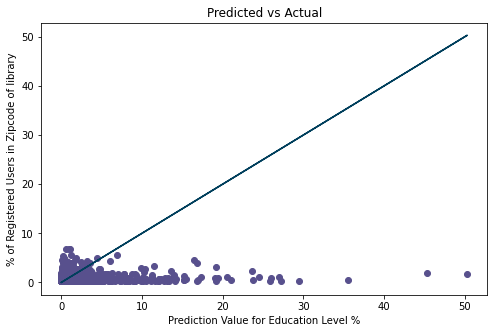

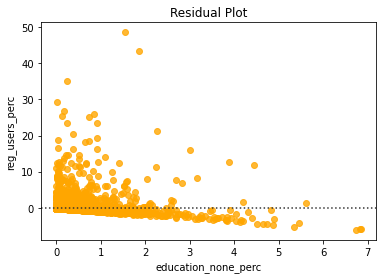

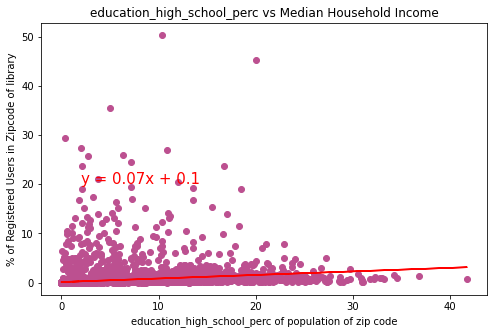

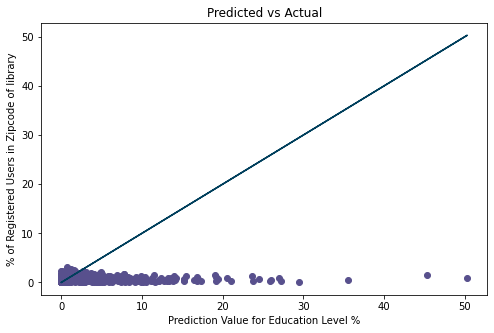

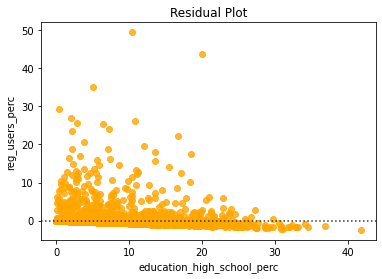

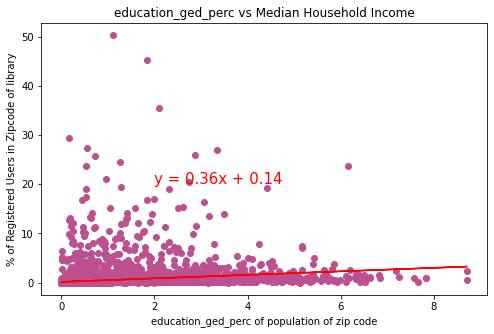

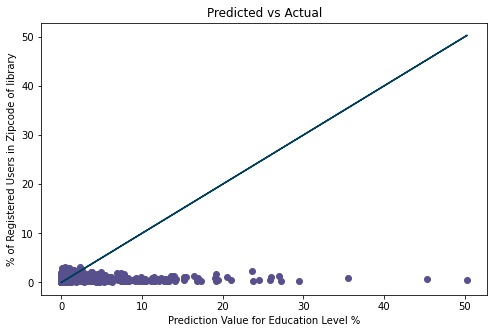

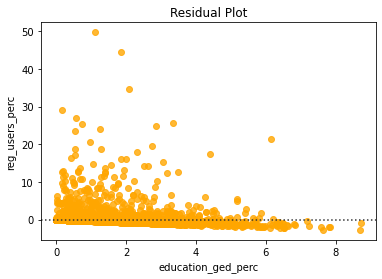

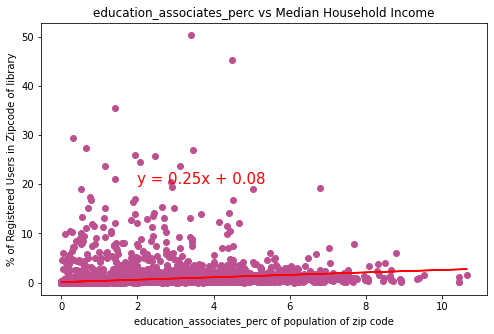

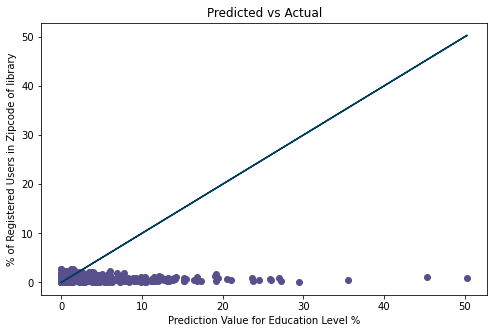

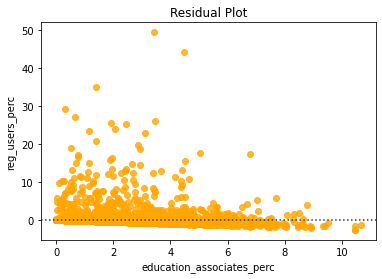

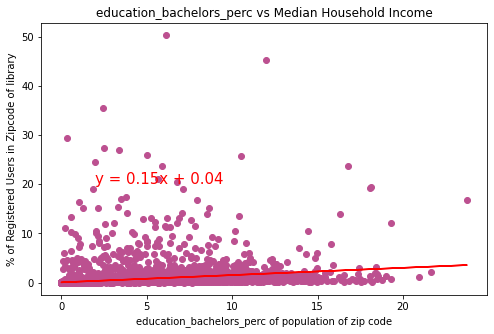

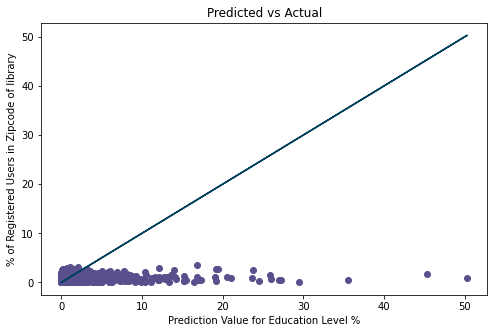

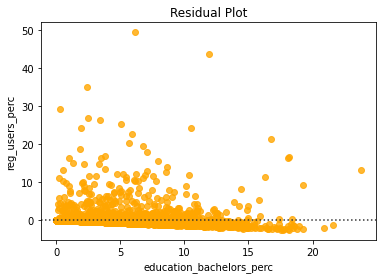

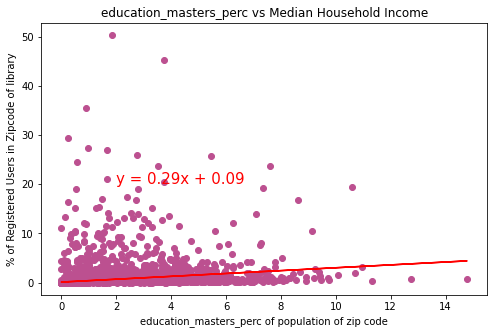

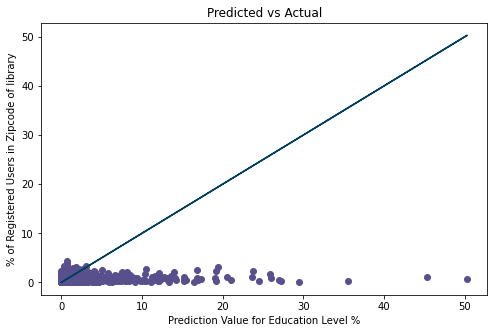

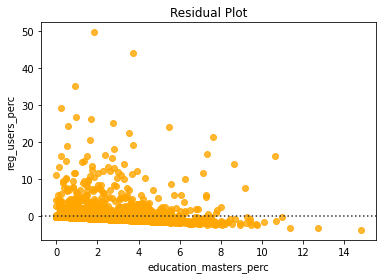

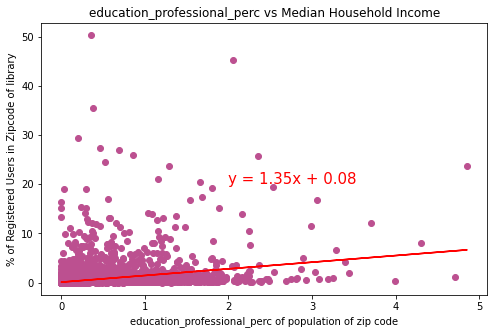

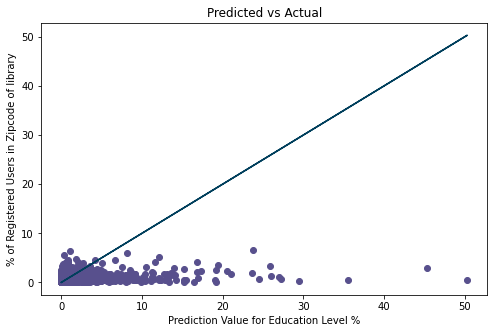

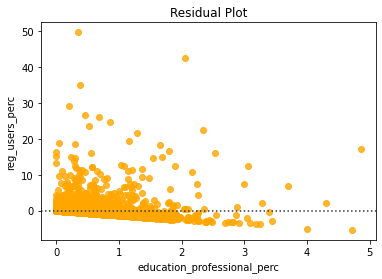

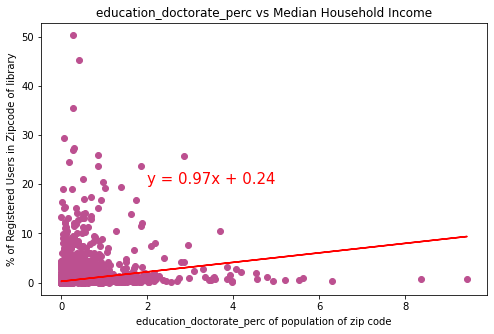

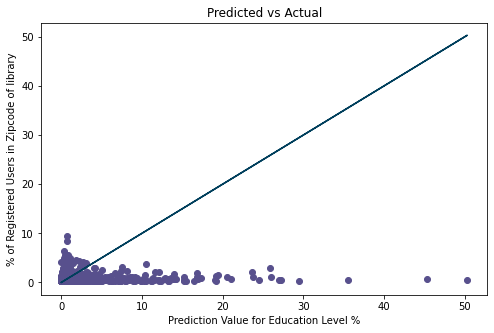

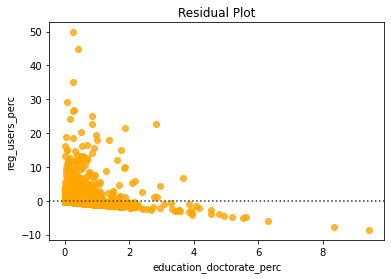

In [84]:
#linear regression


for perc in percentages:
   
    # Add the linear regression equation and line to plot
    plt.figure(figsize=(8,5))
    x_values = df[perc]
    y_values = df["reg_users_perc"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color="#BC5090")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(2, 20),fontsize=15,color="red")
    plt.xlabel(f"{perc} of population of zip code")
    plt.ylabel('% of Registered Users in Zipcode of library')
    plt.title(f'{perc} vs Median Household Income')
    plt.show()

    #predicted vs actual
    plt.figure(figsize=(8,5))
    plt.scatter(y_values, regress_values, color="#58508D") # plot predicted data
    plt.plot(y_values,y_values) # plot a line of actual data
    plt.xlabel("Prediction Value for Education Level %")
    plt.ylabel('% of Registered Users in Zipcode of library')
    plt.title("Predicted vs Actual")
    plt.show()
    
    #https://seaborn.pydata.org/generated/seaborn.residplot.html
    #residual plot
    ax = sns.residplot(x=perc, y="reg_users_perc", data=df, color="#FFA600")
    plt.title("Residual Plot")

In [31]:
 # STATSMODELS
X = df["education_bachelors_perc"]
X = sm.add_constant(X) # adding a constant

y = df["reg_users_perc"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         reg_users_perc   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     729.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.08e-154
Time:                        17:42:08   Log-Likelihood:                -17341.
No. Observations:                9158   AIC:                         3.469e+04
Df Residuals:                    9156   BIC:                         3.470e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
X = sm.add_constant(df[percentages])
Y = df.reg_users_perc

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         reg_users_perc   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     182.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.58e-287
Time:                        17:42:08   Log-Likelihood:                -17013.
No. Observations:                9158   AIC:                         3.404e+04
Df Residuals:                    9149   BIC:                         3.411e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0543      0.022      2.421      0.015       0.010       0.098
education_none_perc             0.6544      0.053     12.392      0.000       0.551       0.758
education_high_school_perc     -0.0453      0.009     -4.791      0.000      -0.064      -0.027
education_ged_perc              0.2549      0.033      7.719      0.000       0.190       0.320
education_associates_perc      -0.0458      0.030     -1.546      0.122      -0.104       0.012
education_bachelors_perc        0.1133      0.019      5.847      0.000       0.075       0.151
education_masters_perc         -0.3834      0.044     -8.798      0.000      -0.469      -0.298
education_professional_perc     1.5350      0.087     17.577      0.000       1.364       1.706
education_doctorate_perc        0.2157      0.077      2.793      0.005       0.064       0.367
==============================================================================
Omnibus:                    16519.628   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27594091.587
Skew:                          13.087   Prob(JB):                         0.00
Kurtosis:                     270.637   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
for perc in percentages:
    X = sm.add_constant(df[perc])
    Y = df.reg_users_perc

    model = sm.OLS(Y,X)
    results = model.fit()
    results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarnin

# ANOVA test

In [34]:
percentages

['education_none_perc',
 'education_high_school_perc',
 'education_ged_perc',
 'education_associates_perc',
 'education_bachelors_perc',
 'education_masters_perc',
 'education_professional_perc',
 'education_doctorate_perc']

In [35]:
group1= df["education_none_perc"]
group2= df["education_high_school_perc"]
group3= df["education_ged_perc"]
group4= df["education_associates_perc"]
group5= df["education_bachelors_perc"]
group6= df["education_masters_perc"]
group7= df["education_professional_perc"]
group8= df["education_doctorate_perc"]
regusers = df["reg_users_perc"]

In [36]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=3801.2036704632765, pvalue=0.0)

In [37]:
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=False))
print(stats.ttest_ind(group1, group4, equal_var=False))
print(stats.ttest_ind(group1, group5, equal_var=False))
print(stats.ttest_ind(group1, group6, equal_var=False))
print(stats.ttest_ind(group1, group7, equal_var=False))
print(stats.ttest_ind(group1, group8, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=False))
print(stats.ttest_ind(group2, group5, equal_var=False))
print(stats.ttest_ind(group2, group6, equal_var=False))
print(stats.ttest_ind(group2, group7, equal_var=False))
print(stats.ttest_ind(group2, group8, equal_var=False))

print(stats.ttest_ind(group3, group4, equal_var=False))
print(stats.ttest_ind(group3, group5, equal_var=False))
print(stats.ttest_ind(group3, group6, equal_var=False))
print(stats.ttest_ind(group3, group7, equal_var=False))
print(stats.ttest_ind(group3, group8, equal_var=False))

print(stats.ttest_ind(group4, group5, equal_var=False))
print(stats.ttest_ind(group4, group6, equal_var=False))
print(stats.ttest_ind(group4, group7, equal_var=False))
print(stats.ttest_ind(group4, group8, equal_var=False))

print(stats.ttest_ind(group5, group6, equal_var=False))
print(stats.ttest_ind(group5, group7, equal_var=False))
print(stats.ttest_ind(group5, group8, equal_var=False))

print(stats.ttest_ind(group6, group7, equal_var=False))
print(stats.ttest_ind(group6, group8, equal_var=False))

print(stats.ttest_ind(group7, group8, equal_var=False))

Ttest_indResult(statistic=-79.14069679146057, pvalue=0.0)
Ttest_indResult(statistic=-47.121294692742744, pvalue=0.0)
Ttest_indResult(statistic=-67.79837680119859, pvalue=0.0)
Ttest_indResult(statistic=-70.80479580393406, pvalue=0.0)
Ttest_indResult(statistic=-56.463582807214685, pvalue=0.0)
Ttest_indResult(statistic=-5.1249947680844015, pvalue=3.0063760258522047e-07)
Ttest_indResult(statistic=6.10275493191352, pvalue=1.064193948770136e-09)
Ttest_indResult(statistic=67.21745887159364, pvalue=0.0)
Ttest_indResult(statistic=55.45664188729371, pvalue=0.0)
Ttest_indResult(statistic=29.211154372848515, pvalue=1.2712236094712513e-182)
Ttest_indResult(statistic=59.9618242402655, pvalue=0.0)
Ttest_indResult(statistic=78.61221926622282, pvalue=0.0)
Ttest_indResult(statistic=79.95837149101477, pvalue=0.0)
Ttest_indResult(statistic=-29.02491150001123, pvalue=1.233360410741526e-180)
Ttest_indResult(statistic=-51.58112719373215, pvalue=0.0)
Ttest_indResult(statistic=-17.61153352097214, pvalue=8.3806

In [38]:
print(stats.ttest_ind(group1, regusers, equal_var=False))

print(stats.ttest_ind(group2, regusers, equal_var=False))

print(stats.ttest_ind(group3, regusers, equal_var=False))

print(stats.ttest_ind(group4, regusers, equal_var=False))

print(stats.ttest_ind(group5, regusers, equal_var=False))

print(stats.ttest_ind(group6, regusers, equal_var=False))

print(stats.ttest_ind(group7, regusers, equal_var=False))

print(stats.ttest_ind(group8, regusers, equal_var=False))

Ttest_indResult(statistic=-10.981334297673172, pvalue=6.678035272182581e-28)
Ttest_indResult(statistic=71.49393621299978, pvalue=0.0)
Ttest_indResult(statistic=17.143928128513146, pvalue=2.8677747148354085e-65)
Ttest_indResult(statistic=38.45601699490712, pvalue=0.0)
Ttest_indResult(statistic=57.37567877338788, pvalue=0.0)
Ttest_indResult(statistic=29.416223776079125, pvalue=9.304037657377671e-186)
Ttest_indResult(statistic=-9.328382570417315, pvalue=1.3005502787024014e-20)
Ttest_indResult(statistic=-13.148979127003784, pvalue=3.627939498978753e-39)


In [88]:
#create dataframe of results for presentation

ttest= pd.DataFrame()
ttest["Values"]= ["statistic", "p-value"]
ttest["No Education vs Registered Users"]= stats.ttest_ind(group1, regusers, equal_var=False)
ttest["GED vs Registered Users"]= stats.ttest_ind(group2, regusers, equal_var=False)
ttest["High School vs Registered Users"]= stats.ttest_ind(group3, regusers, equal_var=False)
ttest["Associates vs Registered Users"]= stats.ttest_ind(group4, regusers, equal_var=False)
ttest["Bachelors vs Registered Users"]= stats.ttest_ind(group5, regusers, equal_var=False)
ttest["Masters vs Registered Users"]= stats.ttest_ind(group6, regusers, equal_var=False)
ttest["Professional vs Registered Users"]= stats.ttest_ind(group7, regusers, equal_var=False)
ttest["Doctorite vs Registered Users"]= stats.ttest_ind(group8, regusers, equal_var=False)

ttest

,Values,No Education vs Registered Users,GED vs Registered Users,High School vs Registered Users,Associates vs Registered Users,Bachelors vs Registered Users,Masters vs Registered Users,Professional vs Registered Users,Doctorite vs Registered Users
0,statistic,-1.098133e+01,71.493936,1.714393e+01,38.456017,57.375679,2.941622e+01,-9.328383e+00,-1.314898e+01
1,p-value,6.678035e-28,0.000000,2.867775e-65,0.000000,0.000000,9.304038e-186,1.300550e-20,3.627939e-39
